In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ● В период Surge видим более низкую price-to-order конверсию

### Если добавить предложение бонусов для всех клиентов в период Surge, конверсия price-to-order вырастет на 5%

In [106]:
data_set = pd.read_csv('new_dataframe.csv')

data_set['price-to-order'] = data_set['order_made'] / data_set['price_seen']

In [107]:
quer = 'surge == "surge"'

In [108]:
data_set['group_choice'] = data_set.query(quer)['user_id'].apply(
    lambda x: 1 if np.random.rand() > 0.5 else 2
)

In [109]:
ds_split = data_set.groupby(by=['surge','group_choice']).agg({
    'user_id':'nunique',
    'price-to-order':'mean',
    'hour':'mean',
    'app_opened':'mean',
    'price_seen':'mean',
    'order_made':'mean',
    'ride_completed':'mean',
    'user_cancelled':'mean',
    'city_center_order':'mean',
    'distance':'mean',
    'age':'mean'
}).T

ds_split['difference'] = round(
    ds_split[ds_split.columns[0]] / ds_split[ds_split.columns[1]] - 1
    ,3
)

print(f"""По price-to-order показателям выборки различаются на {ds_split.loc['price-to-order'].difference[0]}:
как {round(ds_split.loc['price-to-order'][('surge',1)],2)} и {round(ds_split.loc['price-to-order'][('surge',2)],2)}""")
print(f'По средним показателям выборки различаются от {ds_split.difference.min()} до {ds_split.difference.max()}')

display(ds_split)

По price-to-order показателям выборки различаются на 0.002:
как 0.72 и 0.72
По средним показателям выборки различаются от -0.001 до 0.011


surge                     surge               difference
group_choice                1.0           2.0           
user_id            11688.000000  11562.000000      0.011
price-to-order         0.723388      0.722296      0.002
hour                  12.486490     12.413249      0.006
app_opened             1.000000      1.000000      0.000
price_seen             1.000000      1.000000      0.000
order_made             0.723388      0.722296      0.002
ride_completed         0.611726      0.611673      0.000
user_cancelled         0.111663      0.110624      0.009
city_center_order      0.567676      0.567932     -0.000
distance               5.403833      5.347774      0.010
age                   25.890725     25.913218     -0.001

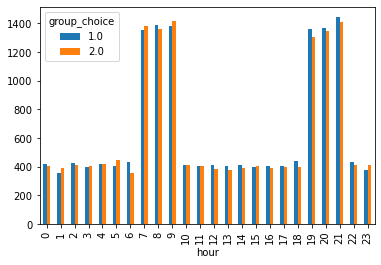

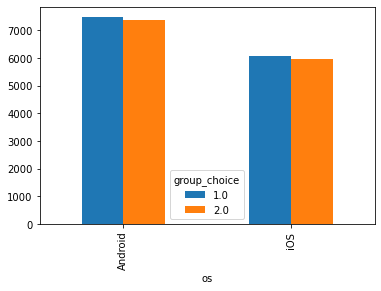

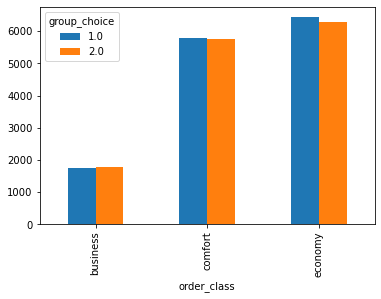

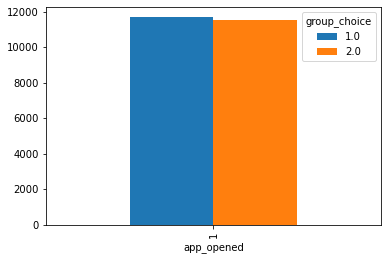

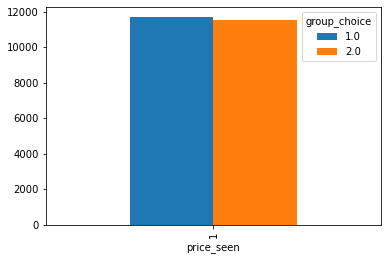

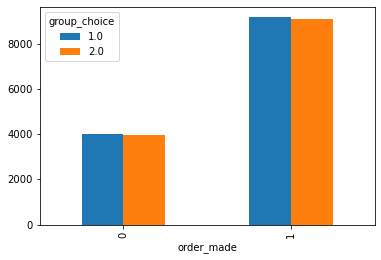

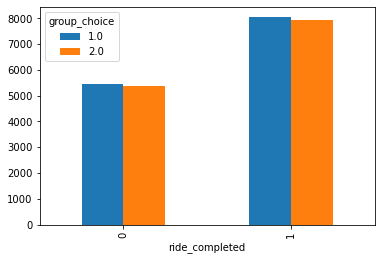

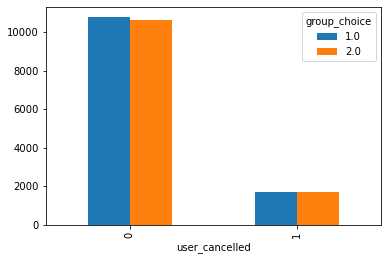

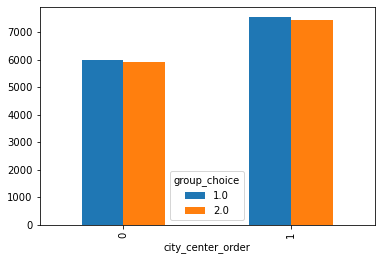

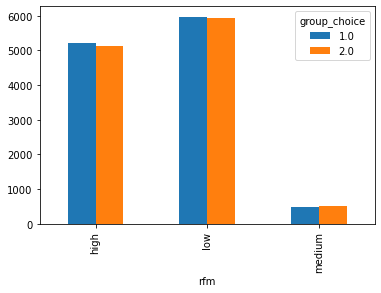

In [110]:
for column in ['hour', 'os', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='user_id',
        aggfunc='nunique'
    ).T.plot.bar();

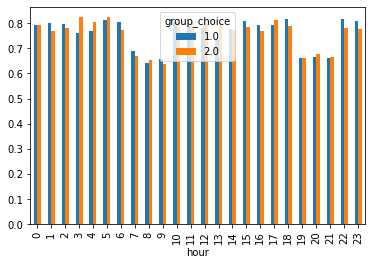

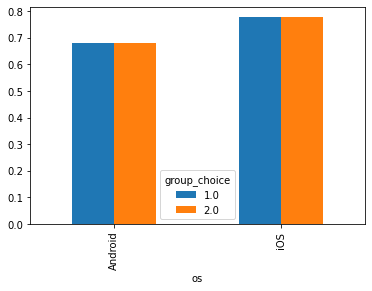

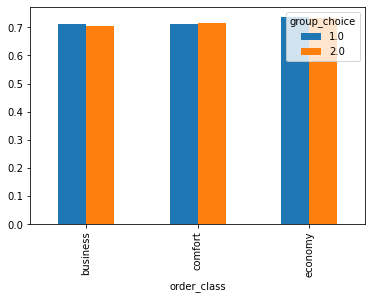

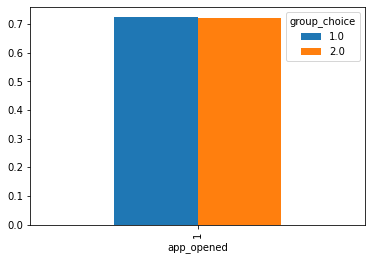

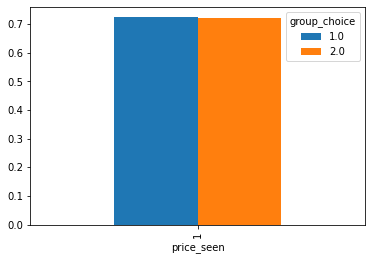

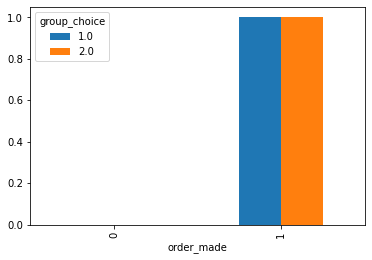

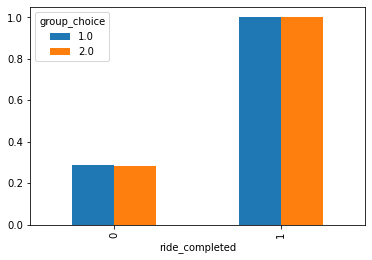

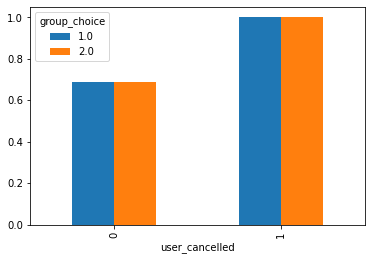

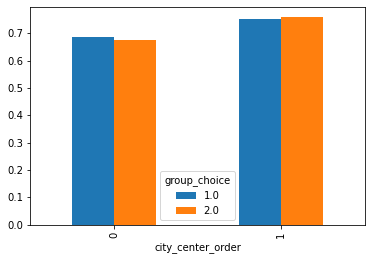

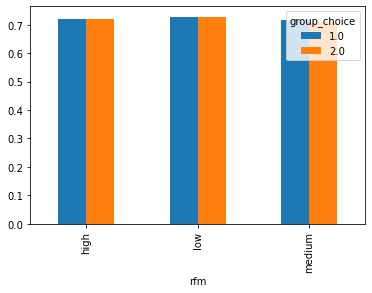

In [111]:
for column in ['hour', 'os', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='price-to-order',
        aggfunc='mean'
    ).T.plot.bar();

In [112]:
ds_ranged = data_set.query(
    'group_choice > 0'
).sort_values(
    by='distance'
)

ds_ranged['n_rank'] = ds_ranged['distance'].rank(
    ascending=False, 
    method='average'
)

ds_ranged

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm,price-to-order,group_choice,n_rank
56017,56017,557088,20,iOS,economy,surge,1,1,1,1,0,0,0.010946,22,high,1.0,2.0,31643.0
66287,66287,342537,20,Android,economy,surge,1,1,1,1,0,1,0.030222,20,high,1.0,2.0,31642.0
30485,30485,753709,2,Android,economy,surge,1,1,1,1,0,0,0.042268,26,low,1.0,2.0,31641.0
99522,99522,658012,8,iOS,economy,surge,1,1,1,1,0,1,0.048325,24,low,1.0,2.0,31640.0
74490,74490,615616,0,Android,economy,surge,1,1,1,0,1,0,0.048850,26,high,1.0,2.0,31639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12268,158828,4,iOS,business,surge,1,1,0,0,0,0,29.927395,29,low,0.0,2.0,5.0
34692,34692,851019,7,iOS,business,surge,1,1,1,1,0,1,30.482253,33,low,1.0,2.0,4.0
71069,71069,471754,9,Android,business,surge,1,1,1,1,0,1,30.694859,25,high,1.0,2.0,3.0
57821,57821,727927,21,Android,business,surge,1,1,1,0,1,1,31.475713,30,low,1.0,2.0,2.0


In [113]:
ds_overed = ds_ranged.groupby('group_choice').agg({
    'user_id':'count',
    'n_rank':'sum' 
})

ds_overed

,user_id,n_rank
group_choice,,
1.0,15914,250914406.0
2.0,15729,249741140.0


In [114]:
n1n2 = ds_overed.user_id[1] * ds_overed.user_id[2]



n1n1 = ds_overed.user_id[1] * (1 + ds_overed.user_id[1]) / 2

r1 = ds_overed.n_rank[1]


n2n2 = ds_overed.user_id[2] * (1 + ds_overed.user_id[2]) / 2

r2 = ds_overed.n_rank[2]



u1 = n1n2 + n1n1 - r1

u2 = n1n2 + n2n2 - r2


MU = min(u1, u2)

print(MU)

124278751.0


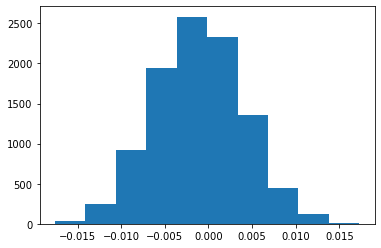

In [115]:
p_diffs = []

group_1 = data_set.query('group_choice == 1')
group_2 = data_set.query('group_choice == 2')

alpha = 0.95

for i in range(10000):
    group_1_sample = group_1.sample(frac=1, replace=True)['price-to-order'].mean()
    group_2_sample = group_2.sample(frac=1, replace=True)['price-to-order'].mean()    
    p_diffs.append(  group_2_sample - group_1_sample  )

plt.hist(p_diffs);     

In [116]:
p_diffs = pd.DataFrame(p_diffs)
p_diffs.columns=['mean_pto']

A,B = p_diffs['mean_pto'].quantile(alpha/2), p_diffs['mean_pto'].quantile(1 - alpha/2)

print(f'Граница доверительного интервала: {A:.4%}, {B:.4%}')
print()

if np.sign(A) == np.sign(B):
    answer = 'не '
else:
    answer= ''

print(f'Разница {answer}несуществена')

Граница доверительного интервала: -0.1493%, -0.0829%

Разница не несуществена


# ● Для устройств Android наблюдаем более высокие юзерские отмены

### Если добавить пуши для пользователей устройств Android, доля юзерских отмен уменьшится на 5%

In [117]:
data_set = pd.read_csv('new_dataframe.csv')

In [118]:
quer = 'os == "Android"'

In [119]:
data_set['group_choice'] = data_set.query(quer)['user_id'].apply(
    lambda x: 1 if np.random.rand() > 0.5 else 2
)

In [120]:
ds_split = data_set.groupby(by=['os','group_choice']).agg({
    'user_id':'nunique',
    'user_cancelled':'mean',
    'hour':'mean',
    'app_opened':'mean',
    'price_seen':'mean',
    'order_made':'mean',
    'ride_completed':'mean',
    'city_center_order':'mean',
    'distance':'mean',
    'age':'mean'
}).T

ds_split['difference'] = round(
    ds_split[ds_split.columns[0]] / ds_split[ds_split.columns[1]] - 1
    ,3
)

print(f"""По user_cancelled показателям выборки различаются на {ds_split.loc['user_cancelled'].difference[0]}:
как {round(ds_split.loc['user_cancelled'][('Android',1)],2)} и {round(ds_split.loc['user_cancelled'][('Android',2)],2)}""")
print(f'По средним показателям выборки различаются от {ds_split.difference.min()} до {ds_split.difference.max()}')

display(ds_split)

По user_cancelled показателям выборки различаются на 0.012:
как 0.13 и 0.13
По средним показателям выборки различаются от -0.006 до 0.012


os                      Android               difference
group_choice                1.0           2.0           
user_id            16772.000000  16880.000000     -0.006
user_cancelled         0.130458      0.128939      0.012
hour                  11.498559     11.500682     -0.000
app_opened             1.000000      1.000000      0.000
price_seen             0.885840      0.879734      0.007
order_made             0.687769      0.681028      0.010
ride_completed         0.557311      0.552090      0.009
city_center_order      0.564144      0.561881      0.004
distance               5.379721      5.361702      0.003
age                   25.940963     25.964819     -0.001

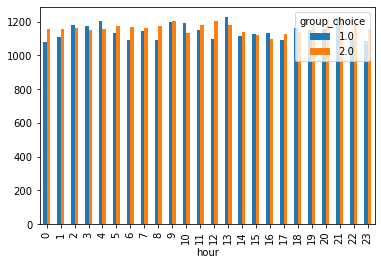

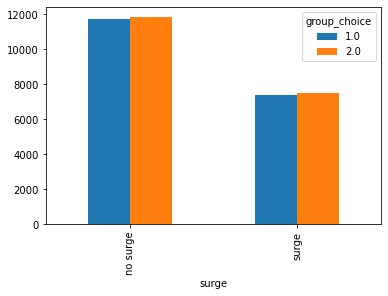

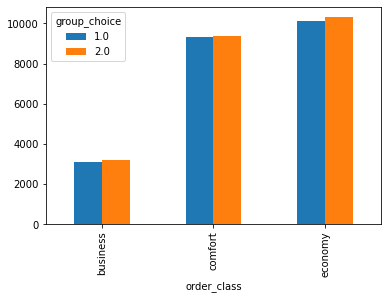

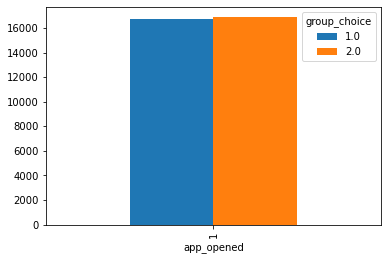

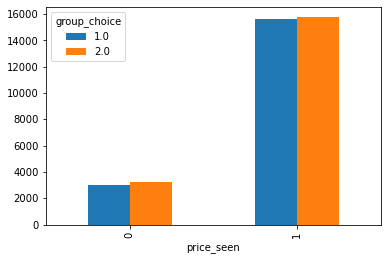

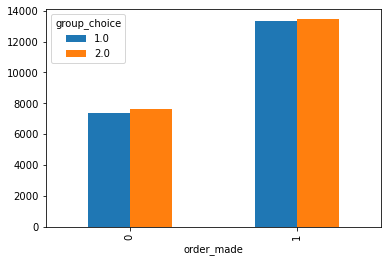

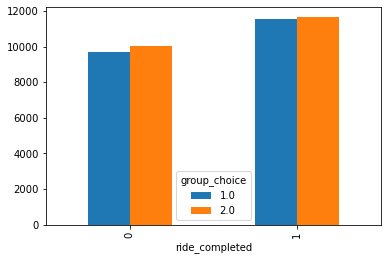

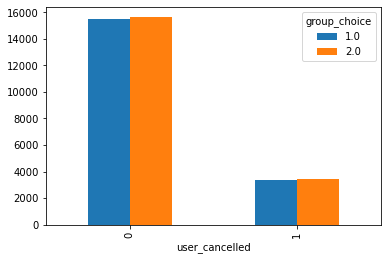

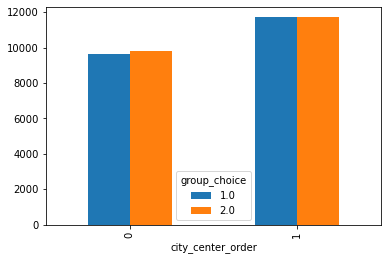

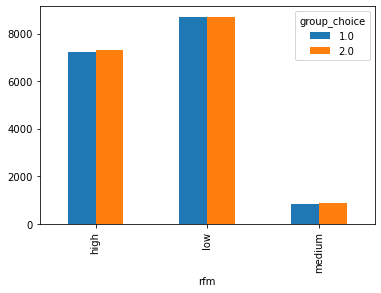

In [121]:
for column in ['hour', 'surge', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='user_id',
        aggfunc='nunique'
    ).T.plot.bar();

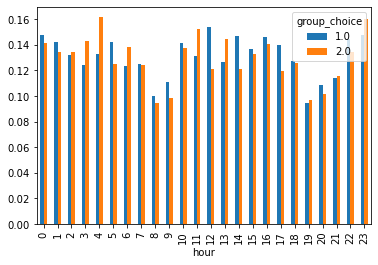

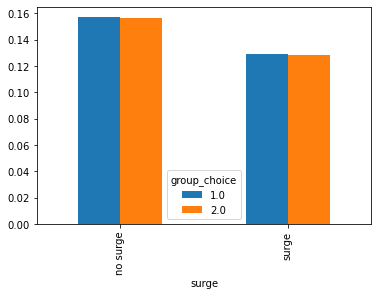

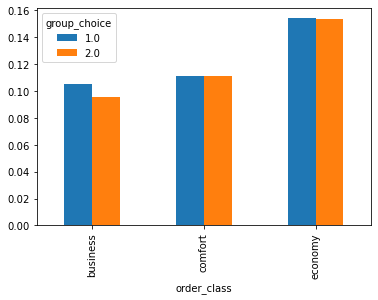

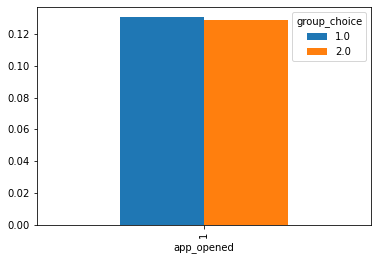

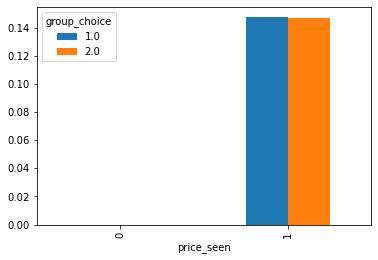

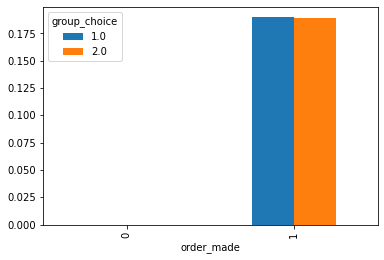

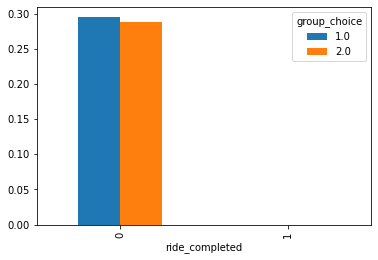

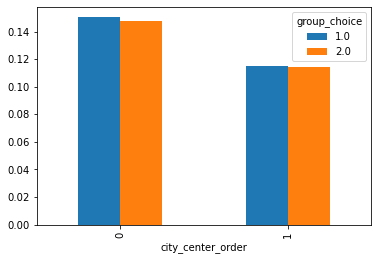

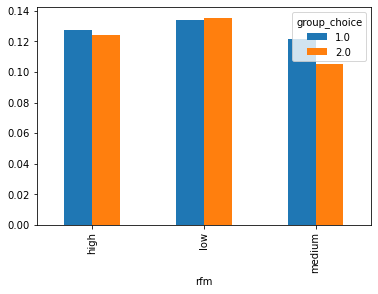

In [122]:
for column in ['hour', 'surge', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='user_cancelled',
        aggfunc='mean'
    ).T.plot.bar();

In [123]:
ds_ranged = data_set.query(
    'group_choice > 0'
).sort_values(
    by='distance'
)

ds_ranged['n_rank'] = ds_ranged['distance'].rank(
    ascending=False, 
    method='average'
)

ds_ranged

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm,group_choice,n_rank
94955,94955,850944,2,Android,economy,no surge,1,1,1,1,0,0,0.022687,18,high,2.0,50049.0
30734,30734,355050,18,Android,economy,no surge,1,1,1,0,1,1,0.025761,45,low,2.0,50048.0
66287,66287,342537,20,Android,economy,surge,1,1,1,1,0,1,0.030222,20,high,2.0,50047.0
92790,92790,291489,19,Android,economy,no surge,1,1,0,0,0,0,0.031468,23,high,2.0,50046.0
30485,30485,753709,2,Android,economy,surge,1,1,1,1,0,0,0.042268,26,low,1.0,50045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101465,101465,940677,5,Android,comfort,NaN,1,0,0,0,0,0,NaN,29,low,1.0,NaN
101467,101467,516750,4,Android,comfort,NaN,1,0,0,0,0,1,NaN,39,high,1.0,NaN
101469,101469,248955,6,Android,comfort,NaN,1,0,0,0,0,1,NaN,30,high,1.0,NaN
101474,101474,216082,22,Android,comfort,NaN,1,0,0,0,0,0,NaN,53,medium,2.0,NaN


In [124]:
ds_overed = ds_ranged.groupby('group_choice').agg({
    'user_id':'count',
    'n_rank':'sum' 
})

ds_overed

,user_id,n_rank
group_choice,,
1.0,28101,622259706.0
2.0,28595,630216519.0


In [125]:
n1n2 = ds_overed.user_id[1] * ds_overed.user_id[2]



n1n1 = ds_overed.user_id[1] * (1 + ds_overed.user_id[1]) / 2

r1 = ds_overed.n_rank[1]


n2n2 = ds_overed.user_id[2] * (1 + ds_overed.user_id[2]) / 2

r2 = ds_overed.n_rank[2]



u1 = n1n2 + n1n1 - r1

u2 = n1n2 + n2n2 - r2


MU = min(u1, u2)

print(MU)

576135540.0


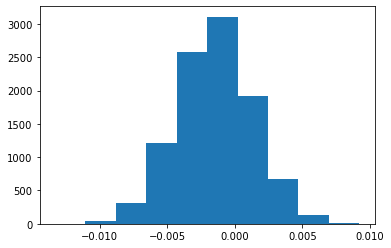

In [126]:
p_diffs = []

group_1 = data_set.query('group_choice == 1')
group_2 = data_set.query('group_choice == 2')

alpha = 0.95

for i in range(10000):
    group_1_sample = group_1.sample(frac=1, replace=True).user_cancelled.mean()
    group_2_sample = group_2.sample(frac=1, replace=True).user_cancelled.mean()   
    p_diffs.append(  group_2_sample - group_1_sample  )

plt.hist(p_diffs);  

In [127]:
p_diffs = pd.DataFrame(p_diffs)
p_diffs.columns=['mean_pto']

A,B = p_diffs['mean_pto'].quantile(alpha/2), p_diffs['mean_pto'].quantile(1 - alpha/2)

print(f'Граница доверительного интервала: {A:.4%}, {B:.4%}')
print()

if np.sign(A) == np.sign(B):
    answer = 'не '
else:
    answer= ''

print(f'Разница {answer}несуществена')

Граница доверительного интервала: -0.1665%, -0.1308%

Разница не несуществена
